In [1]:
!pip install mpmath
!pip install networkx

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42) #Reprodutibilidade
X= np.arange(1, 11).reshape(-1, 1) #X de 1 a 10
y= 2 * X.flatten() + np.random.normal(0, 1, size=X.shape[0]) #y= 2x + ruído

In [3]:
print("dados de entrada(X): ")
print(X[0:5])
print("\nDados de saída (y):")
print(y[0:5])
print()

dados de entrada(X): 
[[1]
 [2]
 [3]
 [4]
 [5]]

Dados de saída (y):
[2.49671415 3.8617357  6.64768854 9.52302986 9.76584663]



In [4]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1,1)

In [5]:
# Passo 3: Dividindo os dados em treino e teste
# Como estamos no PyTorch, vamos fazer manualmente
train_size = int(0.8 * len(X_tensor))
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

In [6]:
print("\nX_treino: ", X_train.numpy().flatten())
print("y_treino: ", y_train.numpy().flatten())
print("X_teste: ", X_test.numpy().flatten())
print("y_teste: ", y_test.numpy().flatten())


X_treino:  [1. 2. 3. 4. 5. 6. 7. 8.]
y_treino:  [ 2.496714   3.8617356  6.6476884  9.52303    9.765846  11.765863
 15.579213  16.767435 ]
X_teste:  [ 9. 10.]
y_teste:  [17.530525 20.54256 ]


In [7]:
# Passo 4: Definindo o modelo de regressão linear
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # Camada linear: y = a*x + b

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

In [8]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [14]:
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Época [{epoch+1}/{epochs}], Perda: {loss.item():.4f}')

Época [50/1000], Perda: 0.4472
Época [100/1000], Perda: 0.4460
Época [150/1000], Perda: 0.4453
Época [200/1000], Perda: 0.4447
Época [250/1000], Perda: 0.4444
Época [300/1000], Perda: 0.4441
Época [350/1000], Perda: 0.4440
Época [400/1000], Perda: 0.4439
Época [450/1000], Perda: 0.4438
Época [500/1000], Perda: 0.4437
Época [550/1000], Perda: 0.4437
Época [600/1000], Perda: 0.4437
Época [650/1000], Perda: 0.4437
Época [700/1000], Perda: 0.4437
Época [750/1000], Perda: 0.4437
Época [800/1000], Perda: 0.4437
Época [850/1000], Perda: 0.4437
Época [900/1000], Perda: 0.4437
Época [950/1000], Perda: 0.4436
Época [1000/1000], Perda: 0.4436


In [15]:
model.eval()
with torch.no_grad():
    y_pred= model(X_test)

In [16]:
print("\nValores reais: ",y_test.numpy().flatten())
print("Valores previstos: ",y_pred.numpy().flatten())


Valores reais:  [17.530525 20.54256 ]
Valores previstos:  [18.878407 20.951305]


In [17]:
mse= criterion(y_pred, y_test).item()
print("\nErro médio quadrático (MSE): ", round(mse, 4))


Erro médio quadrático (MSE):  0.9919


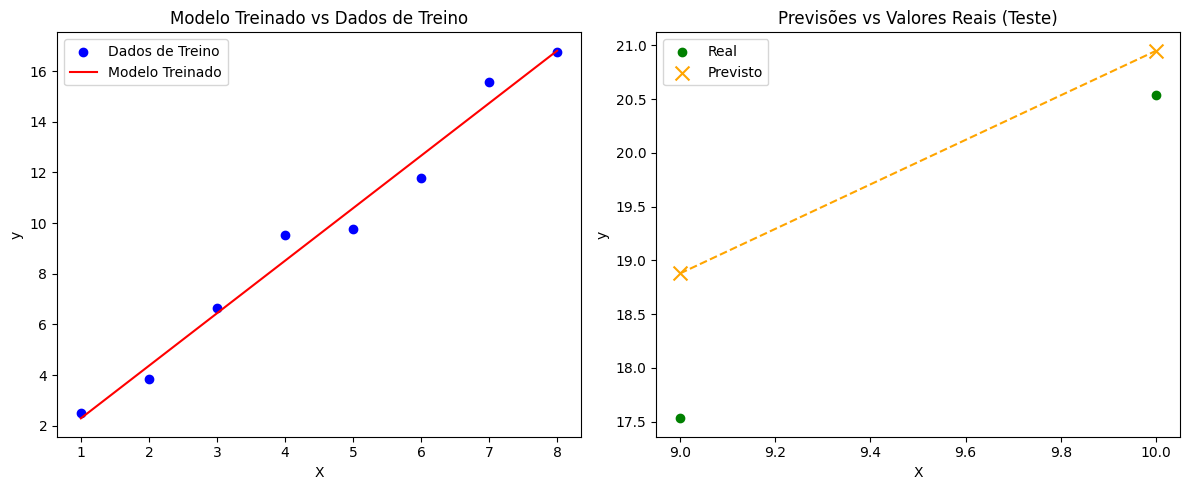

In [18]:
# Passo 8: Visualizando os resultados
plt.figure(figsize=(12, 5))

# Gráfico 1: Dados de treino e linha da regressão
plt.subplot(1, 2, 1)
plt.scatter(X_train.detach().numpy(), y_train.detach().numpy(), color='blue', label='Dados de Treino')
plt.plot(X_train.detach().numpy(), model(X_train).detach().numpy(), color='red', label='Modelo Treinado')
plt.title('Modelo Treinado vs Dados de Treino')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Gráfico 2: Comparando previsões com valores reais no conjunto de teste
plt.subplot(1, 2, 2)
plt.scatter(X_test.detach().numpy(), y_test.detach().numpy(), color='green', label='Real')
plt.scatter(X_test.detach().numpy(), y_pred.detach().numpy(), color='orange', marker='x', s=100, label='Previsto')
plt.plot(X_test.detach().numpy(), y_pred.detach().numpy(), color='orange', linestyle='--')
plt.title('Previsões vs Valores Reais (Teste)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()
